### Imports

In [2]:
########## Imports ##########

import numpy as np
import pandas as pd
from packages import fonctions

# Représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import re
#from Levenshtein import *
import pickle
import os

from datetime import datetime
from time import time

# Outliers
from sklearn.ensemble import IsolationForest

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Warnings
import warnings
warnings.simplefilter(action = 'ignore')

# Set display preferences
pd.set_option('display.max_row', 250)
pd.set_option('display.max_column', 100)

In [3]:
# Choix d'une palette de couleurs

sns.set_palette('Set2', color_codes = True)
print(sns.color_palette('Set2').as_hex())
# palettes testées : 'Spectral', 'flare', 'twilight', 'husl', 'Set1', 'Set2', 'Set3'
sns.set_style('darkgrid')
sns.color_palette()

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [4]:
########## Import données csv ##########
# dossier data hors du dossier code pour ne pas l'importer dans github

df = pd.read_csv('../data/flipkart_com-ecommerce_sample_1050.csv')
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


### Analyse exploratoire des données (EDA)

In [ ]:
# EXPLORER CHAQUE FEATURE
# -> uniq_id -> est-ce qu'ils sont vraiment tous uniques ? est-ce qu'ils font tous la même longueur ?

In [5]:
df.shape

(1050, 15)

In [6]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [8]:
########## Duplicats ##########

fonctions.remove_duplicates(df)

********** Détection des doublons **********

Nombre de duplicats dans le jeu de données = 0


********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 341

Pourcentage de valeurs manquantes : 2.17


Valeurs manquantes par colonne : 



,Nombres de valeurs manquantes,% de valeurs manquantes
brand,338,32.19
retail_price,1,0.10
discounted_price,1,0.10
product_specifications,1,0.10



Heatmap des valeurs manquantes : 



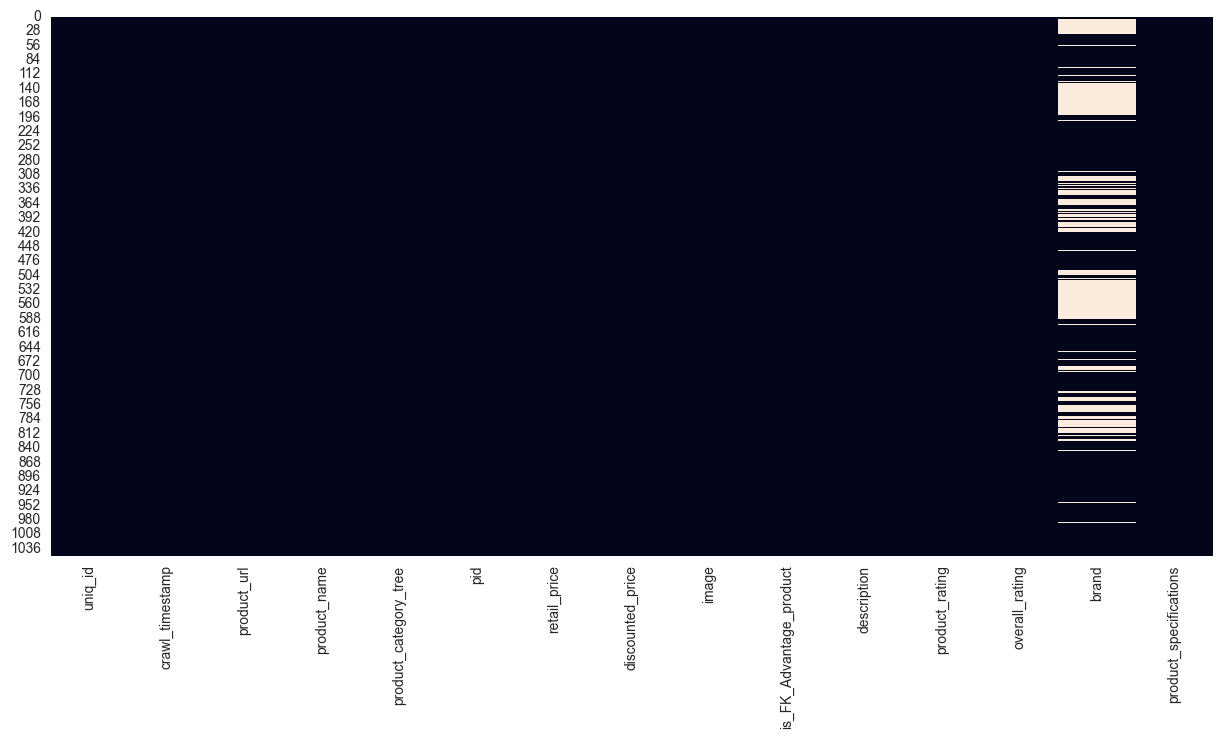

In [9]:
########## Valeurs manquantes ##########

# Identification des valeurs manquantes par variable :
fonctions.nan_detection(df)

# -> nombreuses pour 'brand' (30%)
# -> peu nombreuses pour 'retail_price', 'discounted_price', 'product_specifications' (1 seule valeur manquante)

# est-ce pour la même ligne ?

In [10]:
df.loc[df['retail_price'].isna()]

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."


In [11]:
# même ligne pour retail_price et discounted_price mais pas pour product_specifications

########## Gestion des valeurs manquantes ##########
# -> drop des deux lignes pour lesquelles on a 1 valeur manquante pour les 3 variables
# -> drop de la feature 'brand' ?

df.drop(['brand'], axis = 1, inplace = True)

In [12]:
df.dropna(inplace = True)

In [13]:
fonctions.nan_detection(df)

********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 0


In [14]:
########## uniq_id ###########
# id uniques

df['uniq_id'].nunique()

1048

In [15]:
########## crawl_timestamp ##########
df['crawl_timestamp']

0       2016-04-30 03:22:56 +0000
1       2016-04-30 03:22:56 +0000
3       2016-06-20 08:49:52 +0000
4       2016-06-20 08:49:52 +0000
5       2015-12-04 07:25:36 +0000
                  ...            
1045    2015-12-01 10:15:43 +0000
1046    2015-12-01 10:15:43 +0000
1047    2015-12-01 10:15:43 +0000
1048    2015-12-01 10:15:43 +0000
1049    2015-12-01 10:15:43 +0000
Name: crawl_timestamp, Length: 1048, dtype: object

In [16]:
# to do -> modifier le format
df['crawl_timestamp'] = df['crawl_timestamp'].apply(lambda x : x.removesuffix(' +0000'))
df['crawl_timestamp']

0       2016-04-30 03:22:56
1       2016-04-30 03:22:56
3       2016-06-20 08:49:52
4       2016-06-20 08:49:52
5       2015-12-04 07:25:36
               ...         
1045    2015-12-01 10:15:43
1046    2015-12-01 10:15:43
1047    2015-12-01 10:15:43
1048    2015-12-01 10:15:43
1049    2015-12-01 10:15:43
Name: crawl_timestamp, Length: 1048, dtype: object

In [17]:
########## product_url ##########
df['product_url'].nunique()

1048

In [18]:
########## product_name ##########
df['product_name'].nunique()

1048

In [19]:
########## product_category_tree ##########
df['product_category_tree'].nunique()

640

In [20]:
########## pid ##########
df['pid'].nunique()

1048

In [21]:
########## retail_price ##########
df['retail_price'].nunique()

354

In [22]:
df['retail_price'].value_counts()

retail_price
999.0      63
499.0      49
599.0      41
1499.0     31
399.0      25
           ..
570.0       1
10999.0     1
3690.0      1
190.0       1
1190.0      1
Name: count, Length: 354, dtype: int64

In [23]:
df['product_rating'].value_counts()

product_rating
No rating available    887
5                       43
4                       21
3                       12
1                       10
4.5                     10
4.3                      9
3.7                      8
3.5                      8
2                        6
4.1                      4
4.2                      4
3.8                      3
4.4                      3
4.7                      3
2.3                      3
3.6                      3
4.8                      2
2.5                      1
3.2                      1
2.2                      1
4.9                      1
3.3                      1
3.9                      1
3.1                      1
2.7                      1
1.5                      1
Name: count, dtype: int64

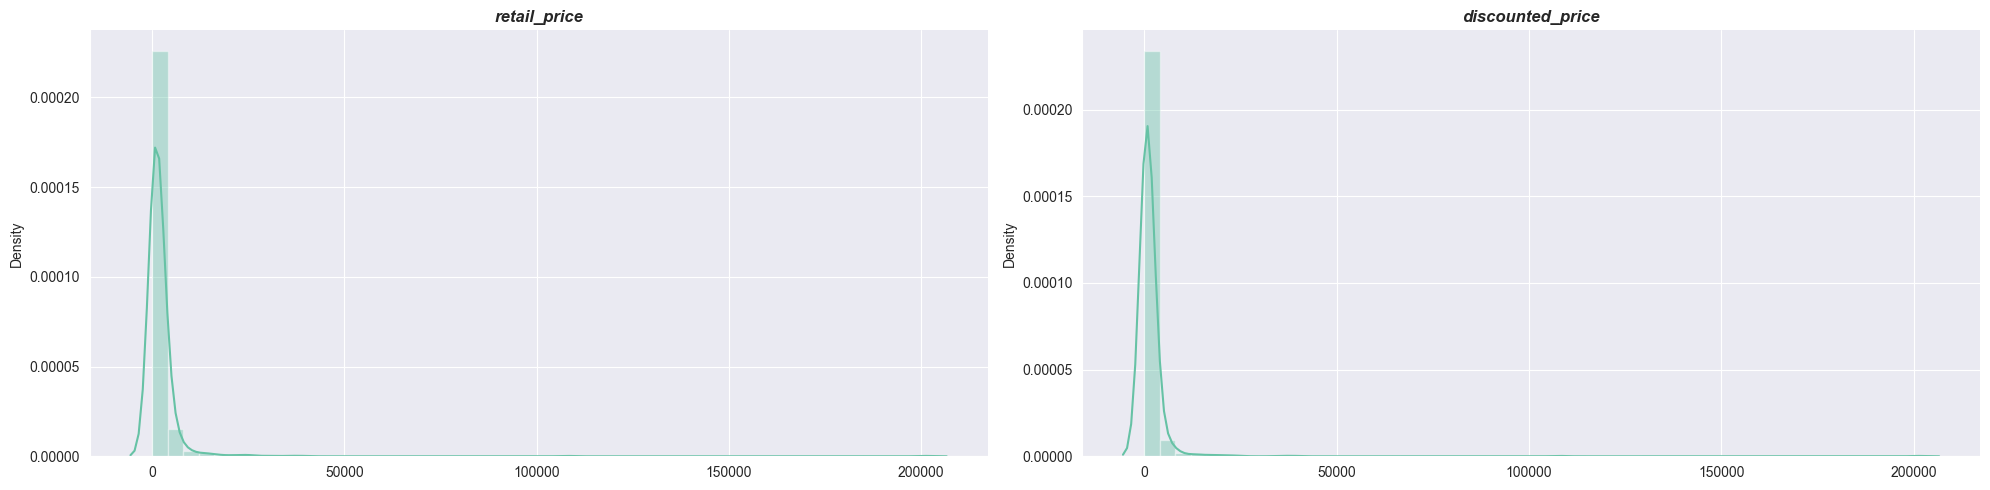

In [24]:
########## Analyse univariée ##########

# Displots des variables quantitatives
columns = df.select_dtypes(include = ['float64', 'int64']).columns

figure = plt.figure(figsize = (20, 5))
for index, col in enumerate(columns):
    figure.add_subplot(1, 2, index + 1)
    sns.distplot(x = df[col])
    plt.title(col, fontweight = 'bold', fontstyle = 'italic')
    sns.despine() # pour enlever limites du graph en haut et à droite
    figure.tight_layout()
plt.show()

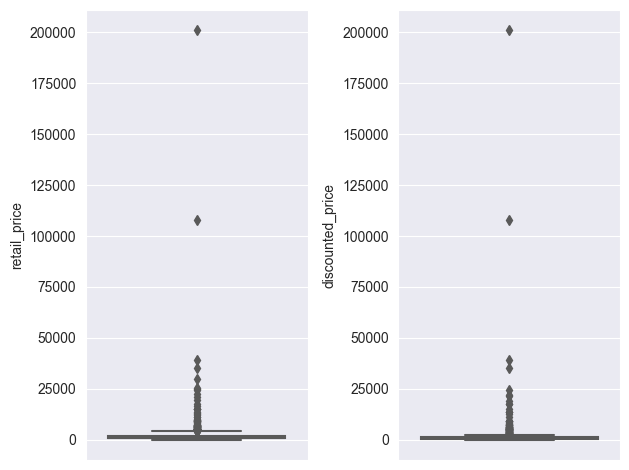

In [25]:
# Boxplots des variables quantitatives
columns = df.select_dtypes(include = ['float64', 'int64']).columns

figure = plt.figure()
for index, col in enumerate(columns):
    figure.add_subplot(1, 2, index + 1)
    sns.boxplot(y = col, data = df)
figure.tight_layout()
plt.show()

In [26]:
# -> outliers

In [27]:
########## Outliers ##########

# prérequis -> plus de nan

# la présence d'outliers a été detecté grâce aux analyses précedantes (cf cartes, boxplots...)
# utiliser l'Isolation Forest et supprimer lignes/valeurs correspondantes
clf = IsolationForest()
preds = clf.fit_predict(df.select_dtypes(include = ['float64']))
preds

array([1, 1, 1, ..., 1, 1, 1])

In [28]:
# anomalies ont un score de -1 : les supprimer
df.drop(df.iloc[np.where(preds == -1)[0]].index, inplace = True)

df.shape

(938, 14)

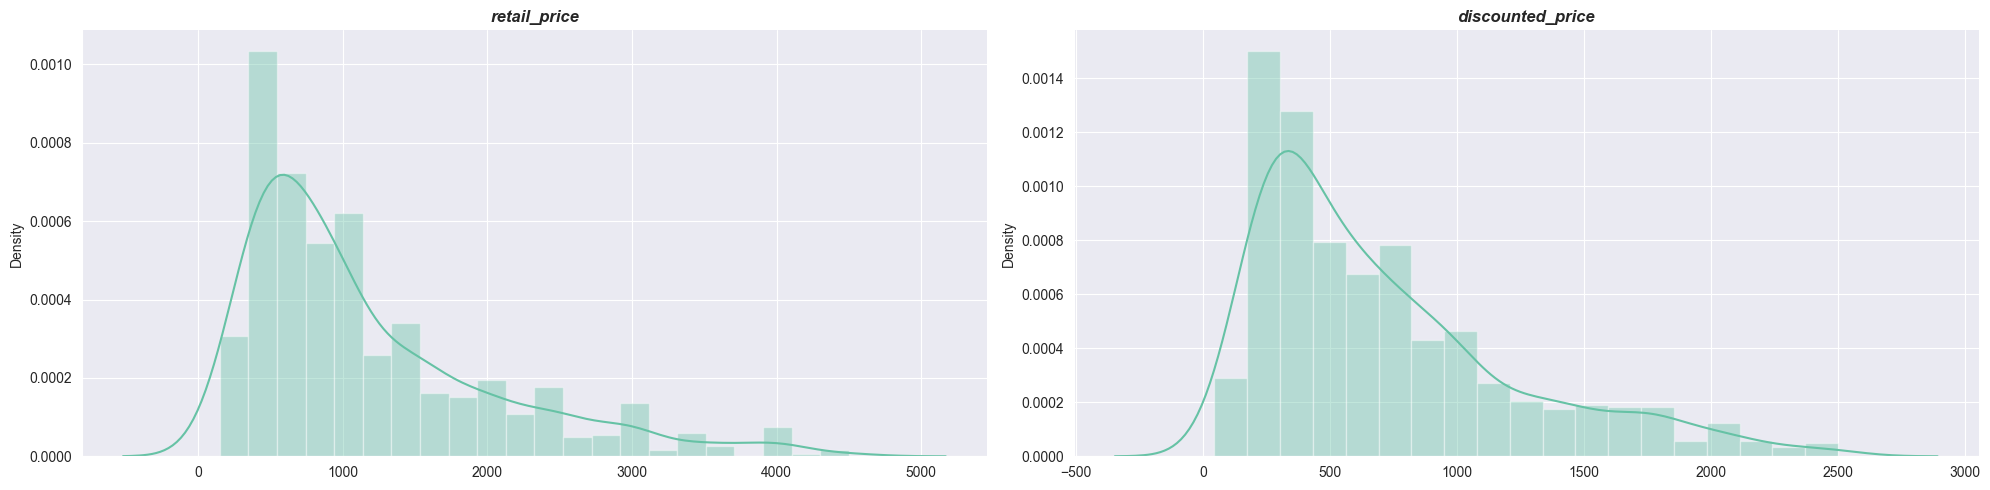

In [29]:
########## Analyse univariée ##########

# Displots des variables quantitatives
columns = df.select_dtypes(include = ['float64', 'int64']).columns

figure = plt.figure(figsize = (20, 5))
for index, col in enumerate(columns):
    figure.add_subplot(1, 2, index + 1)
    sns.distplot(x = df[col])
    plt.title(col, fontweight = 'bold', fontstyle = 'italic')
    sns.despine() # pour enlever limites du graph en haut et à droite
    figure.tight_layout()
plt.show()

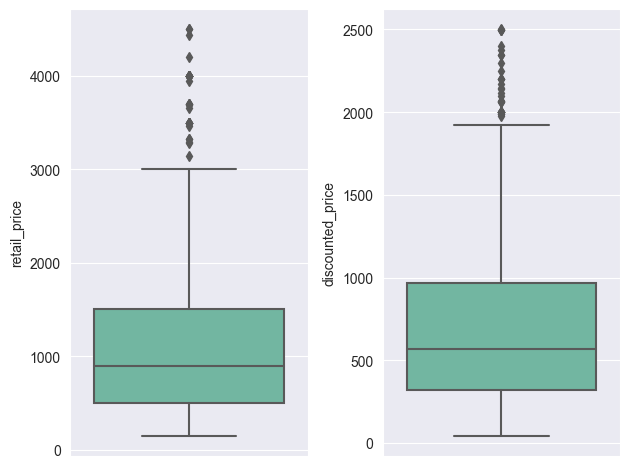

In [30]:
# Boxplots des variables quantitatives
columns = df.select_dtypes(include = ['float64', 'int64']).columns

figure = plt.figure()
for index, col in enumerate(columns):
    figure.add_subplot(1, 2, index + 1)
    sns.boxplot(y = col, data = df)
figure.tight_layout()
plt.show()

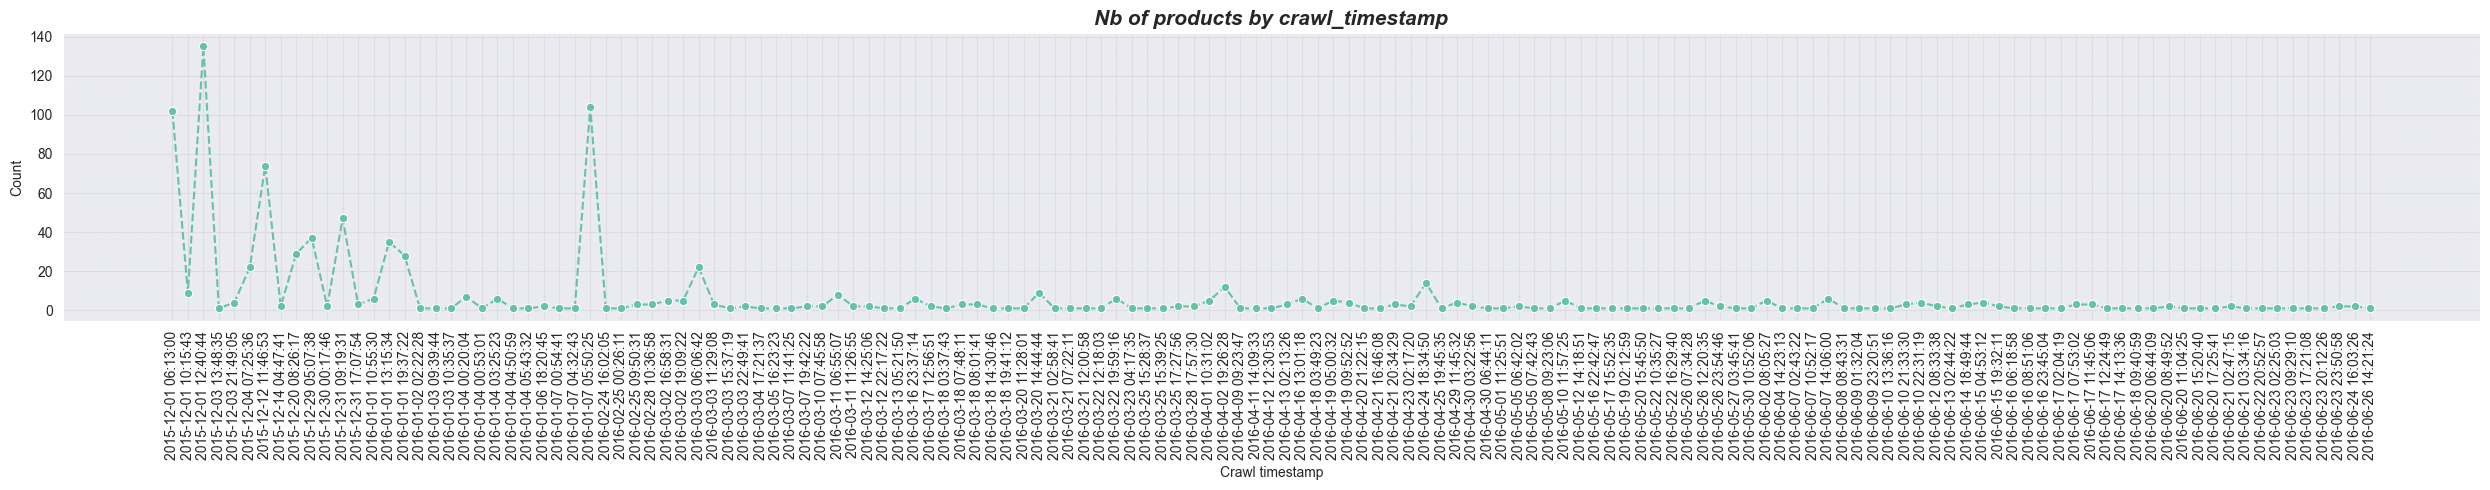

In [31]:
## evolution du nb de produit par crawl_timestamp

plt.figure(figsize = (25, 5))
sns.lineplot(
    x = df.groupby('crawl_timestamp')['uniq_id'].count().index,
    y = df.groupby('crawl_timestamp')['uniq_id'].count().values,
    marker = 'o',
    linestyle = '--'
    )
plt.title('Nb of products by crawl_timestamp', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.xlabel('Crawl timestamp')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [32]:
# enlever heure ?

df['crawl_timestamp'] = df['crawl_timestamp'].apply(lambda x : datetime.strptime(x , '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d'))
df['crawl_timestamp']

0       2016-04-30
1       2016-04-30
3       2016-06-20
4       2016-06-20
6       2015-12-04
           ...    
1044    2015-12-01
1045    2015-12-01
1047    2015-12-01
1048    2015-12-01
1049    2015-12-01
Name: crawl_timestamp, Length: 938, dtype: object

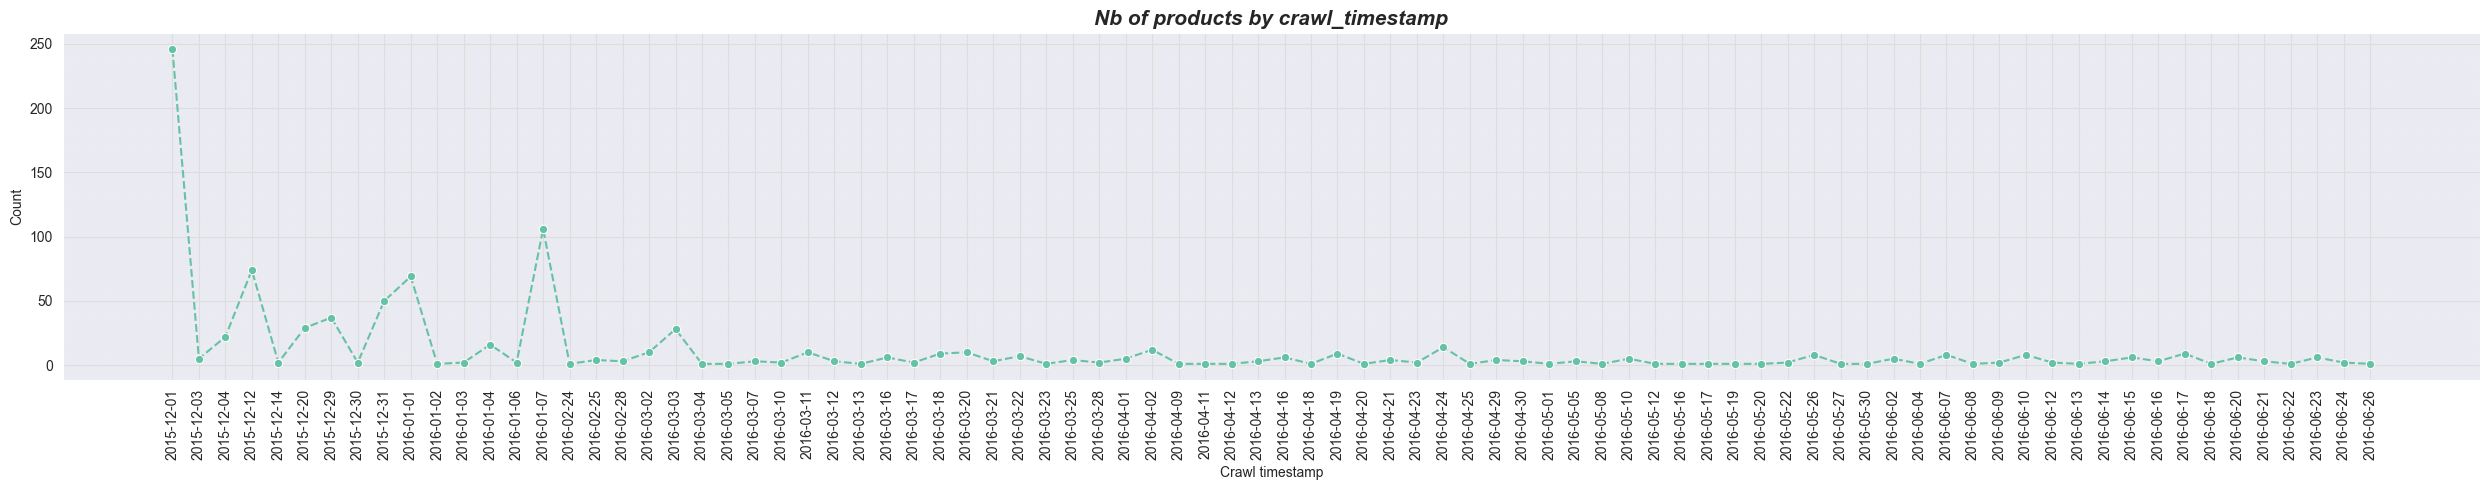

In [33]:
## evolution du nb de produit par crawl_timestamp

plt.figure(figsize = (25, 5))
sns.lineplot(
    x = df.groupby('crawl_timestamp')['uniq_id'].count().index,
    y = df.groupby('crawl_timestamp')['uniq_id'].count().values,
    marker = 'o',
    linestyle = '--'
    )
plt.title('Nb of products by crawl_timestamp', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.xlabel('Crawl timestamp')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

### Exploration des données textes

In [ ]:
# Rapide exploration des données textes pour définir quelles fetures utiliser

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
# Variables texte :
# - uniq_id -> '55b85ea15a1536d46b7190ad6fff8ce7 - id unique du produit - non pertinent
# - product_url -> 'http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z' - url du produit - non pertinent
# - product_name -> 'Elegance Polyester Multicolor Abstract Eyelet Door Curtain' - nom du produit
# - product_category_tree -> '["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]' - arborescence du produit
# - pid -> 'CRNEG7BKMFFYHQ8Z' -> ?????
# - description -> description du produit
# - brand -> marque
# - product_specifications -> toutes les info produits organisées en dictionnaire

In [ ]:
df['product_specifications'][0]

In [ ]:
df['product_specifications'][0].replace('=>', ':').replace('{"product_specification":', '')

In [ ]:
print(re.findall(r"\w+", df['product_specifications'][0]))

In [ ]:
df['product_category_tree'][0]

In [ ]:
print(re.findall(r"\w+", df['product_category_tree'][0]))

In [ ]:
df['product_name'][0]

In [ ]:
# product_category_tree -> pour extraire la catégorie du produit
# description -> pour faire l'analyse de texte

In [ ]:
sentence = '["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

match = re.search(r'(?:\w+\s+){2}(?=\>\>)', sentence)

if match:
    result = match.group(0).strip()
    print(result)

In [ ]:
df['category'] = df.apply(fonctions.get_category, axis = 1)
df['category']

In [ ]:
df['category'].value_counts()

In [ ]:
plt.figure(figsize = (20, 5))
sns.barplot(
    x = df['category'].value_counts().index,
    y = df['category'].value_counts().values
    )
fonctions.addlabels(x = df['category'].value_counts().index, y = df['category'].value_counts().values)
plt.xticks(rotation = 45)
plt.title('Nombre de produit par catégorie', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [ ]:
# trop de catégories -> les regrouper
df['category'].unique()

In [ ]:
dict_categories = {
    'Home and Kitchen Essential' : [
        'Home Furnishing', 'Tray Sets', 'Coffee Mugs', 'Lunch Boxes', 'Caffeine Bowls', 'Water bottle', 'Omic Sippers', 'Kitchen Tools', 'Bar Accessories', 'Bar Glasses', 'Idli Makers', 'Craft Jugs', 'Table Clocks', 'Bhalaria Forks', 'Kitchen Containers'],
    'Baby and Personal Care' : [
        'Baby Care', 'Personal Care'],
    'Electronics and Accessories' : [
        'Wrist Watches', 'Network Components', 'Tablet Accessories', 'Laptop Accessories', 'Pen Drives', 'Computer Components'],
    'Festive and Special Occasion' : ['Festive Needs', 'BFT Bulbs']
}

inverse = { v: k for k, l in dict_categories.items() for v in l }
df['category_4'] = df['category'].map(inverse)

In [ ]:
inverse = { v: k for k, l in dict_categories.items() for v in l }
df['category_4'] = df['category'].map(inverse)

In [ ]:
df['category_4'].value_counts()

In [ ]:
# fonctions suivantes -> non insérées dans le package fonctions.py (car ne serviront qu'une seule fois ici)

In [ ]:
########## Sous-catégorie ##########
def get_sous_category(row):
    match = re.search(r'(?<= >> )([^>>]+)', row['product_category_tree'])

    if match:
        result = match.group(1).strip()
        return result

df['sous_category'] = df.apply(get_sous_category, axis = 1)
df['sous_category']

In [ ]:
plt.figure(figsize = (20, 5))
sns.barplot(
    x = df['sous_category'].value_counts()[:30].index,
    y = df['sous_category'].value_counts()[:30].values
    )
fonctions.addlabels(x = df['sous_category'].value_counts().index[:30], y = df['sous_category'].value_counts().values[:30])
plt.xticks(rotation = 45)
plt.title('Nombre de produit par sous-catégorie (30 plus importantes)', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [ ]:
########## Sous-ensemble ##########
def get_sous_ensemble(row):
    match = re.search(r'(?<= >> )(\w+)', row['product_category_tree'])

    if match:
        result = match.group(1).strip()
        return result

df['sous_ensemble'] = df.apply(get_sous_ensemble, axis = 1)
df['sous_ensemble']

In [ ]:
plt.figure(figsize = (20, 5))
sns.barplot(
    x = df['sous_ensemble'].value_counts()[:30].index,
    y = df['sous_ensemble'].value_counts()[:30].values
    )
fonctions.addlabels(x = df['sous_ensemble'].value_counts().index[:30], y = df['sous_ensemble'].value_counts().values[:30])
plt.xticks(rotation = 45)
plt.title('Nombre de produit par sous-ensemble (30 plus importants)', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [ ]:
########## Export ##########
# Export csv des données nettoyées

# A FAIRE